In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Boolean type variables
## Apply to variables and check the distribution

## highPurity

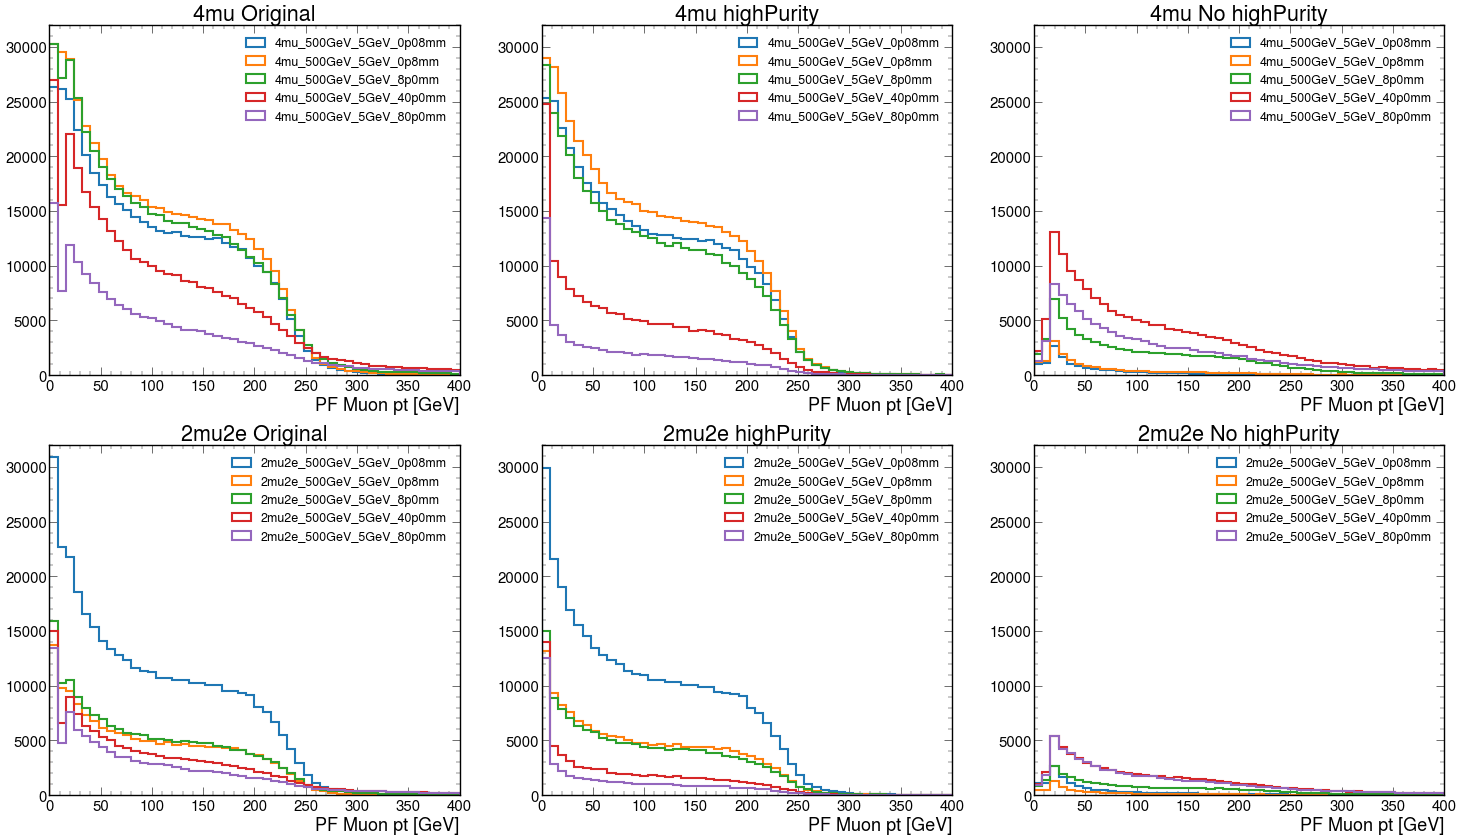

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].highPurity == False)
    mask2 = (events_2mu2e[i_2mu].highPurity == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].highPurity]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].highPurity]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu highPurity')
ax[0][2].set_title('4mu No highPurity')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e highPurity')
ax[1][2].set_title('2mu2e No highPurity')

plt.savefig("../Plots/PF_MUON/Boolean/highPurity_pt.png", bbox_inches="tight")

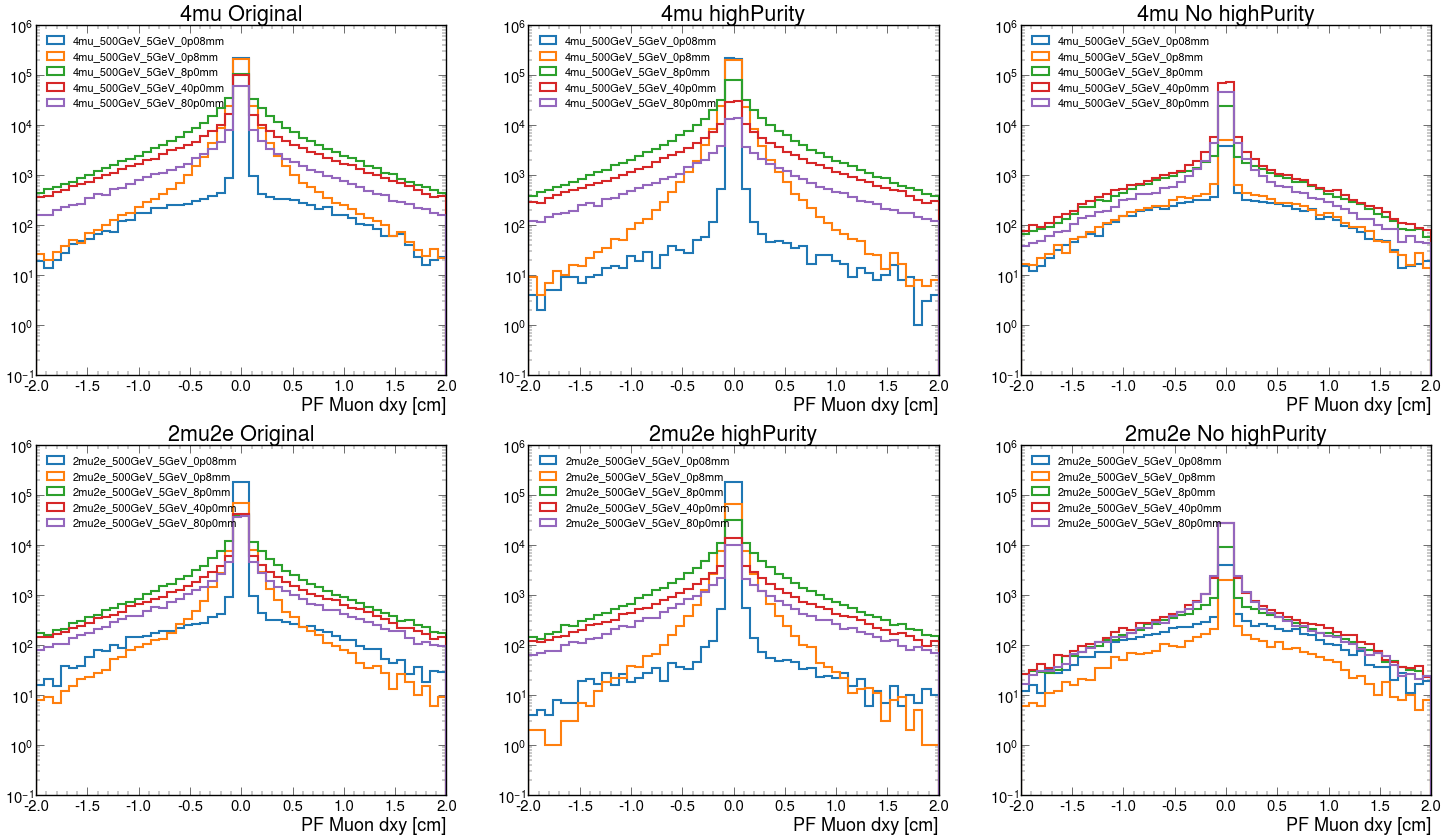

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].highPurity == False)
    mask2 = (events_2mu2e[i_2mu].highPurity == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].highPurity]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].highPurity]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu highPurity')
ax[0][2].set_title('4mu No highPurity')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e highPurity')
ax[1][2].set_title('2mu2e No highPurity')

plt.savefig("../Plots/PF_MUON/Boolean/highPurity_dxy.png", bbox_inches="tight")

## inTimeMuon

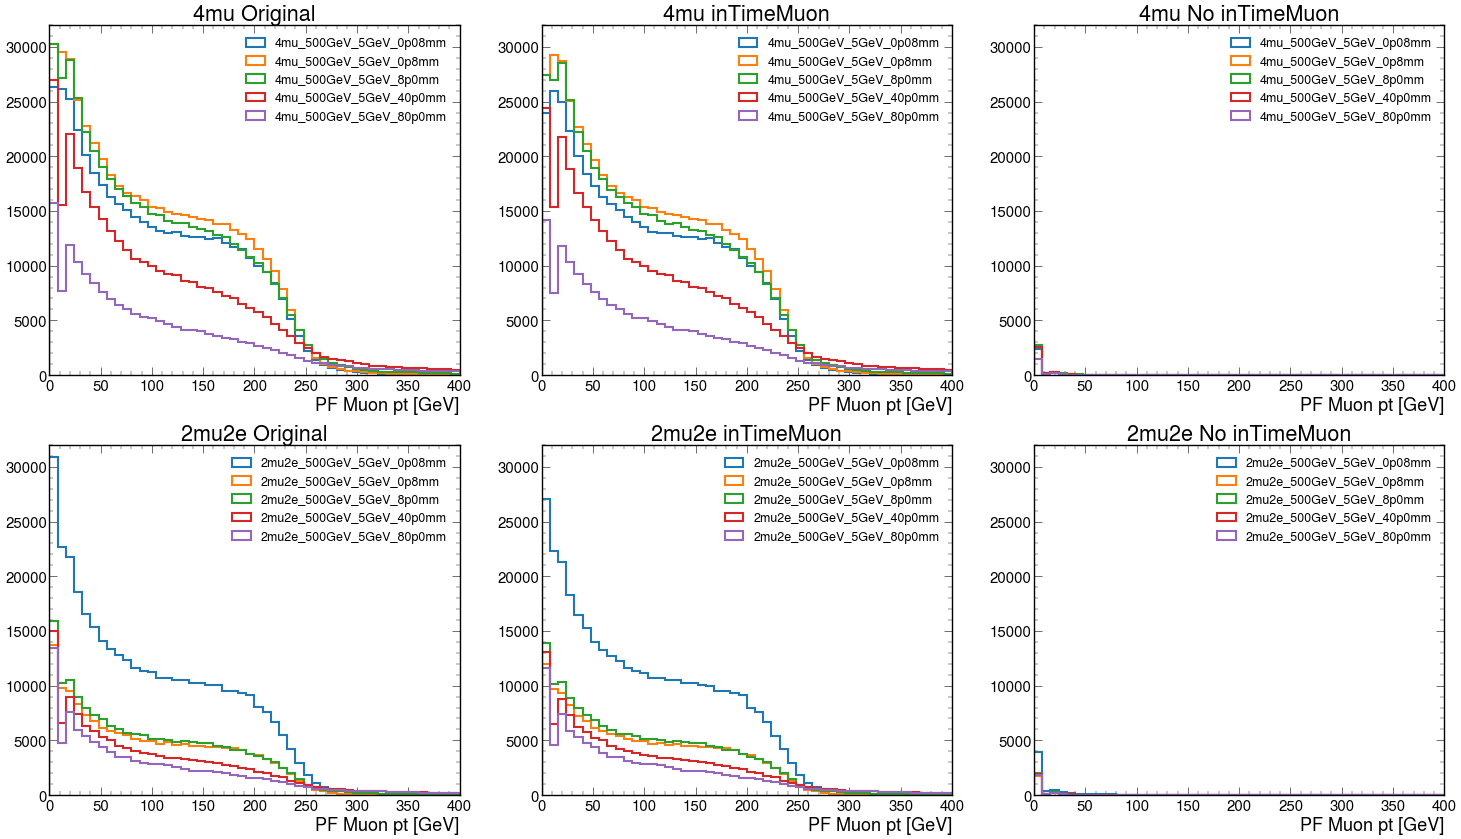

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].inTimeMuon == False)
    mask2 = (events_2mu2e[i_2mu].inTimeMuon == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].inTimeMuon]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].inTimeMuon]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu inTimeMuon')
ax[0][2].set_title('4mu No inTimeMuon')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e inTimeMuon')
ax[1][2].set_title('2mu2e No inTimeMuon')

plt.savefig("../Plots/PF_MUON/Boolean/inTimeMuon_pt.png", bbox_inches="tight")

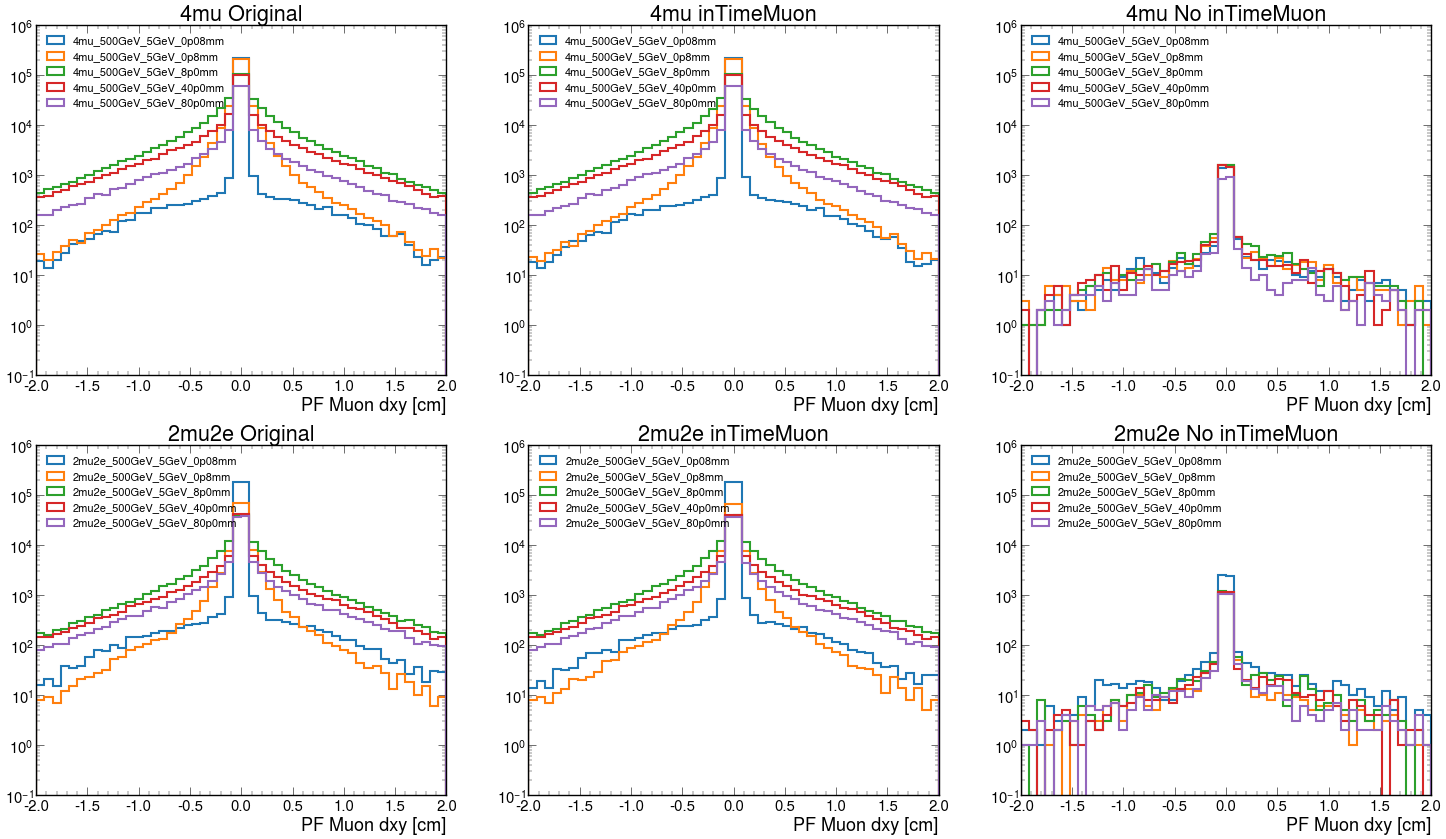

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].inTimeMuon == False)
    mask2 = (events_2mu2e[i_2mu].inTimeMuon == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].inTimeMuon]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].inTimeMuon]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu inTimeMuon')
ax[0][2].set_title('4mu No inTimeMuon')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e inTimeMuon')
ax[1][2].set_title('2mu2e No inTimeMuon')

plt.savefig("../Plots/PF_MUON/Boolean/inTimeMuon_dxy.png", bbox_inches="tight")

## isGlobal

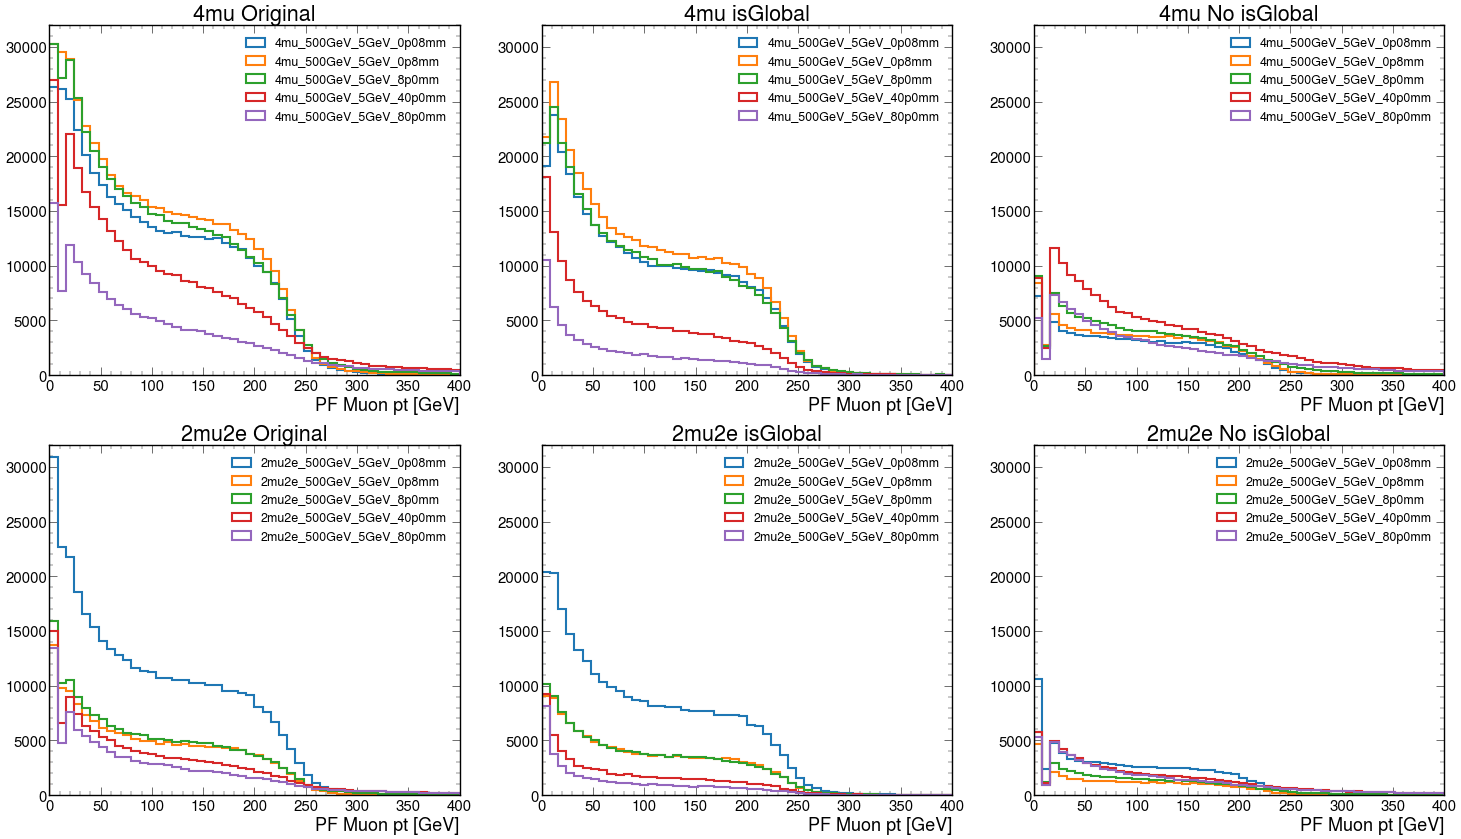

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].isGlobal == False)
    mask2 = (events_2mu2e[i_2mu].isGlobal == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isGlobal]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isGlobal]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isGlobal')
ax[0][2].set_title('4mu No isGlobal')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isGlobal')
ax[1][2].set_title('2mu2e No isGlobal')

plt.savefig("../Plots/PF_MUON/Boolean/isGlobal_pt.png", bbox_inches="tight")

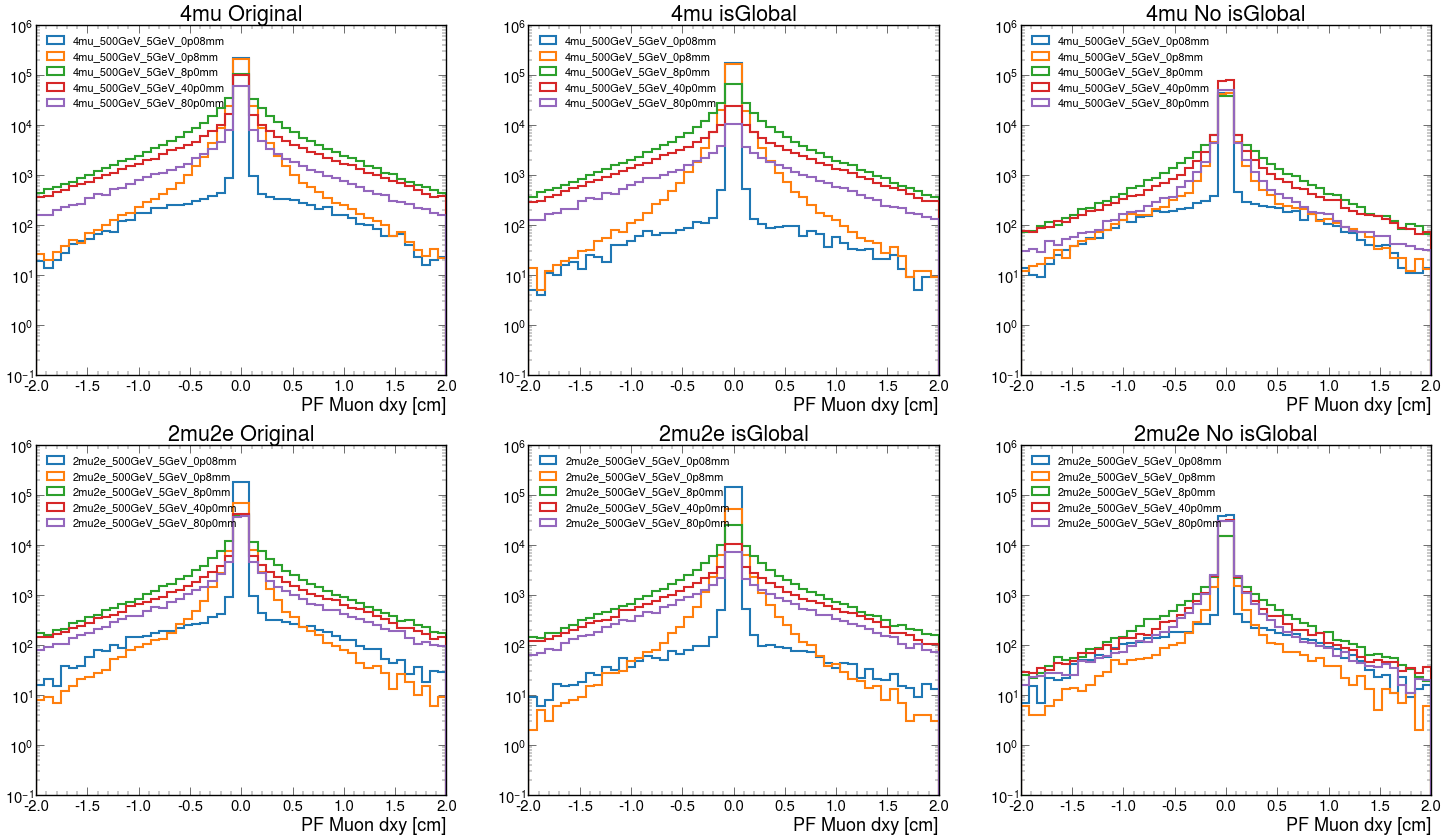

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].isGlobal == False)
    mask2 = (events_2mu2e[i_2mu].isGlobal == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isGlobal]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isGlobal]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isGlobal')
ax[0][2].set_title('4mu No isGlobal')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isGlobal')
ax[1][2].set_title('2mu2e No isGlobal')

plt.savefig("../Plots/PF_MUON/Boolean/isGlobal_dxy.png", bbox_inches="tight")

## isPFcand

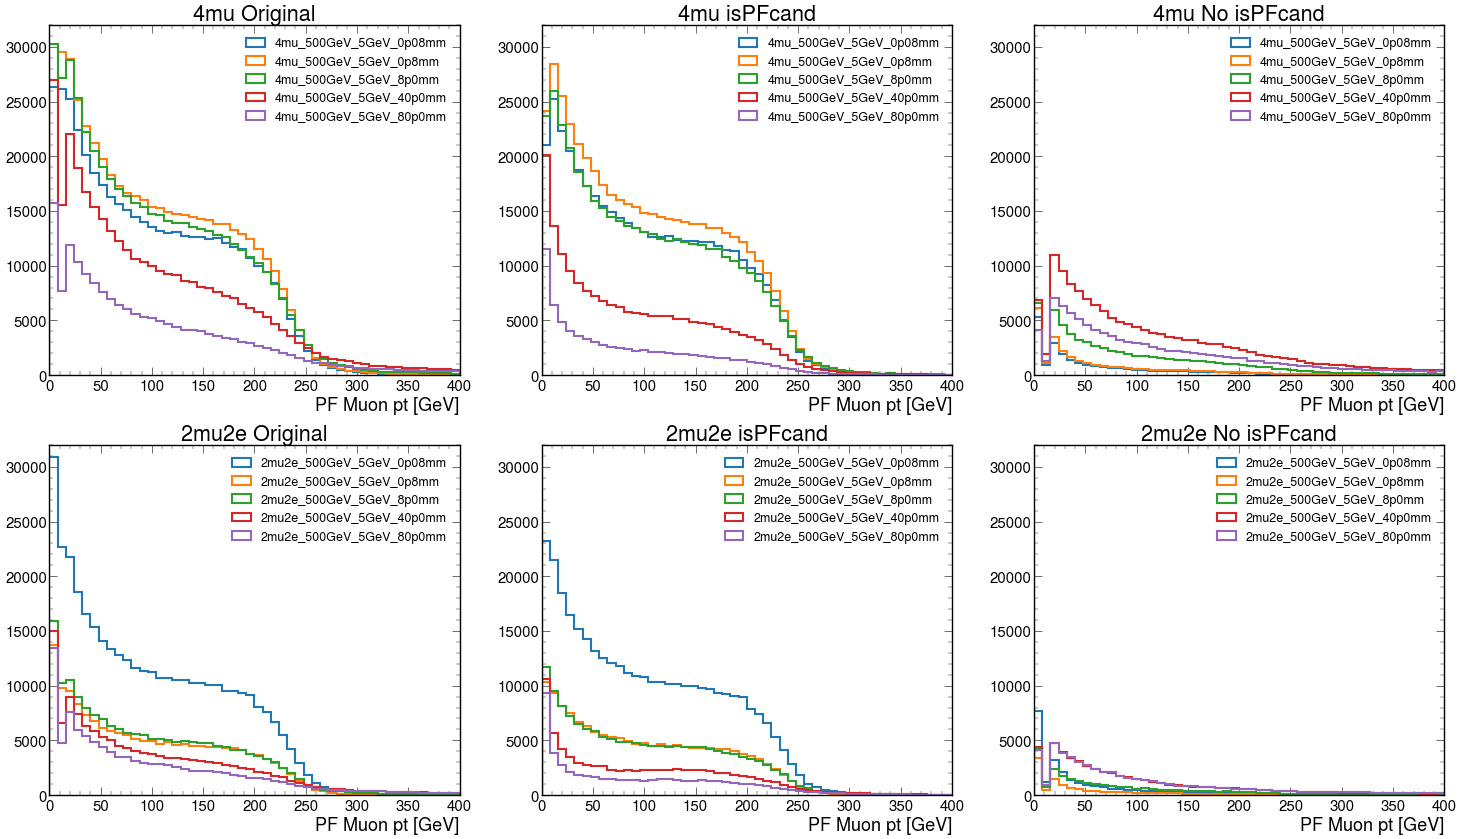

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].isPFcand == False)
    mask2 = (events_2mu2e[i_2mu].isPFcand == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isPFcand]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isPFcand]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isPFcand')
ax[0][2].set_title('4mu No isPFcand')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isPFcand')
ax[1][2].set_title('2mu2e No isPFcand')

plt.savefig("../Plots/PF_MUON/Boolean/isPFcand_pt.png", bbox_inches="tight")

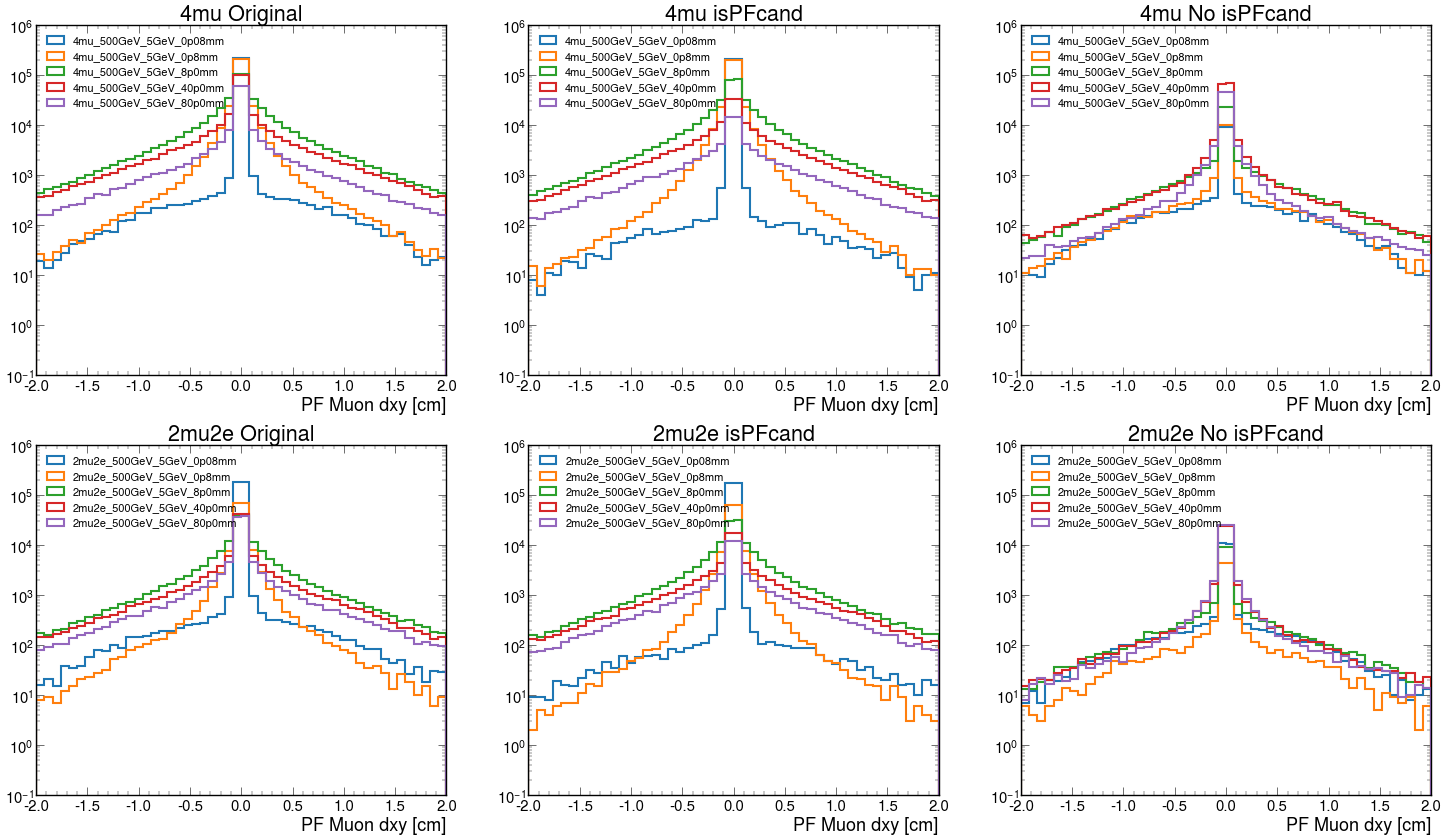

In [18]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].isPFcand == False)
    mask2 = (events_2mu2e[i_2mu].isPFcand == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isPFcand]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isPFcand]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isPFcand')
ax[0][2].set_title('4mu No isPFcand')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isPFcand')
ax[1][2].set_title('2mu2e No isPFcand')

plt.savefig("../Plots/PF_MUON/Boolean/isPFcand_dxy.png", bbox_inches="tight")

## isStandalone

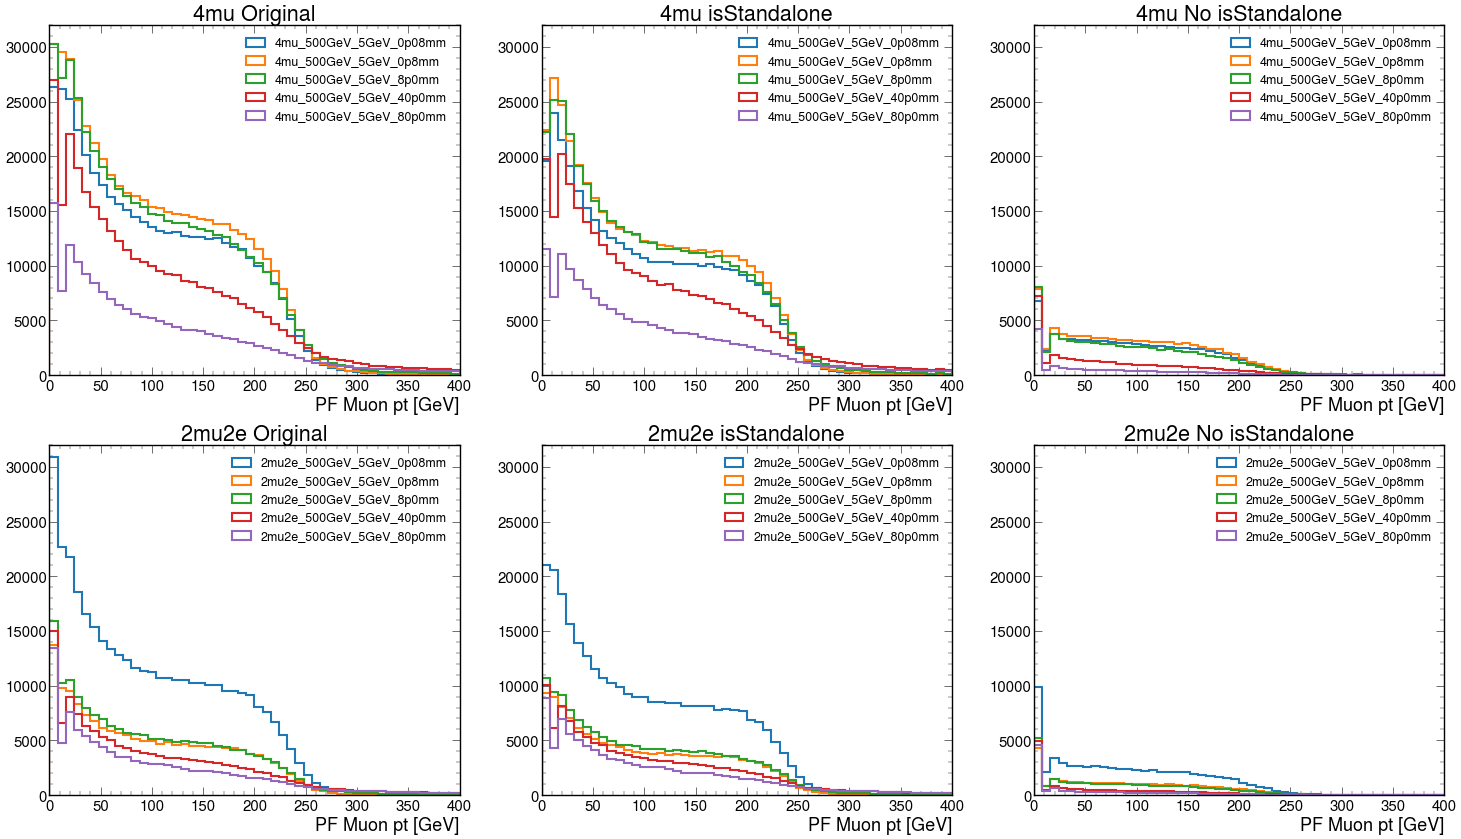

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].isStandalone == False)
    mask2 = (events_2mu2e[i_2mu].isStandalone == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isStandalone]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isStandalone]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isStandalone')
ax[0][2].set_title('4mu No isStandalone')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isStandalone')
ax[1][2].set_title('2mu2e No isStandalone')

plt.savefig("../Plots/PF_MUON/Boolean/isStandalone_pt.png", bbox_inches="tight")

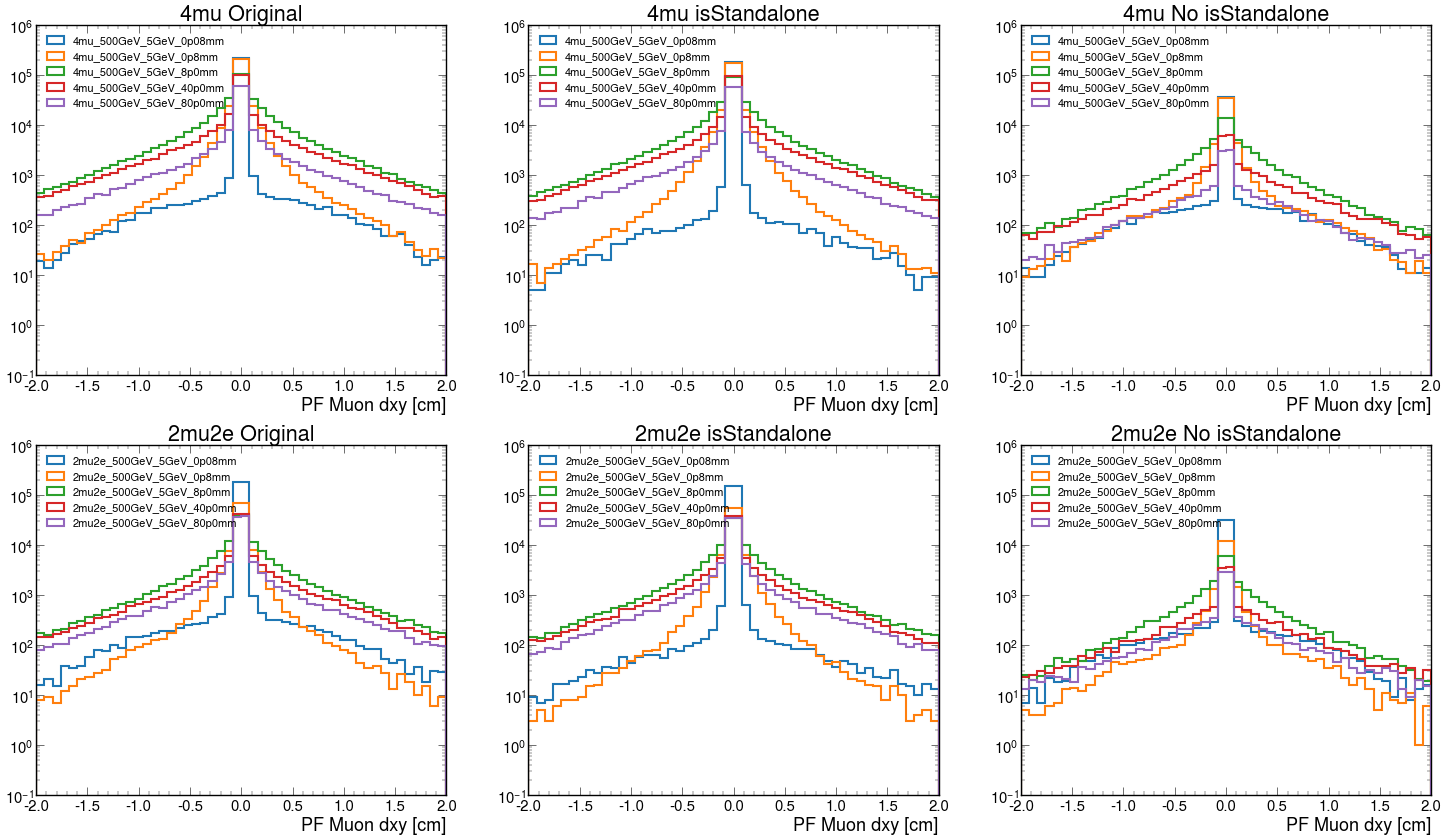

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].isStandalone == False)
    mask2 = (events_2mu2e[i_2mu].isStandalone == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isStandalone]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isStandalone]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isStandalone')
ax[0][2].set_title('4mu No isStandalone')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isStandalone')
ax[1][2].set_title('2mu2e No isStandalone')

plt.savefig("../Plots/PF_MUON/Boolean/isStandalone_dxy.png", bbox_inches="tight")

## isTracker

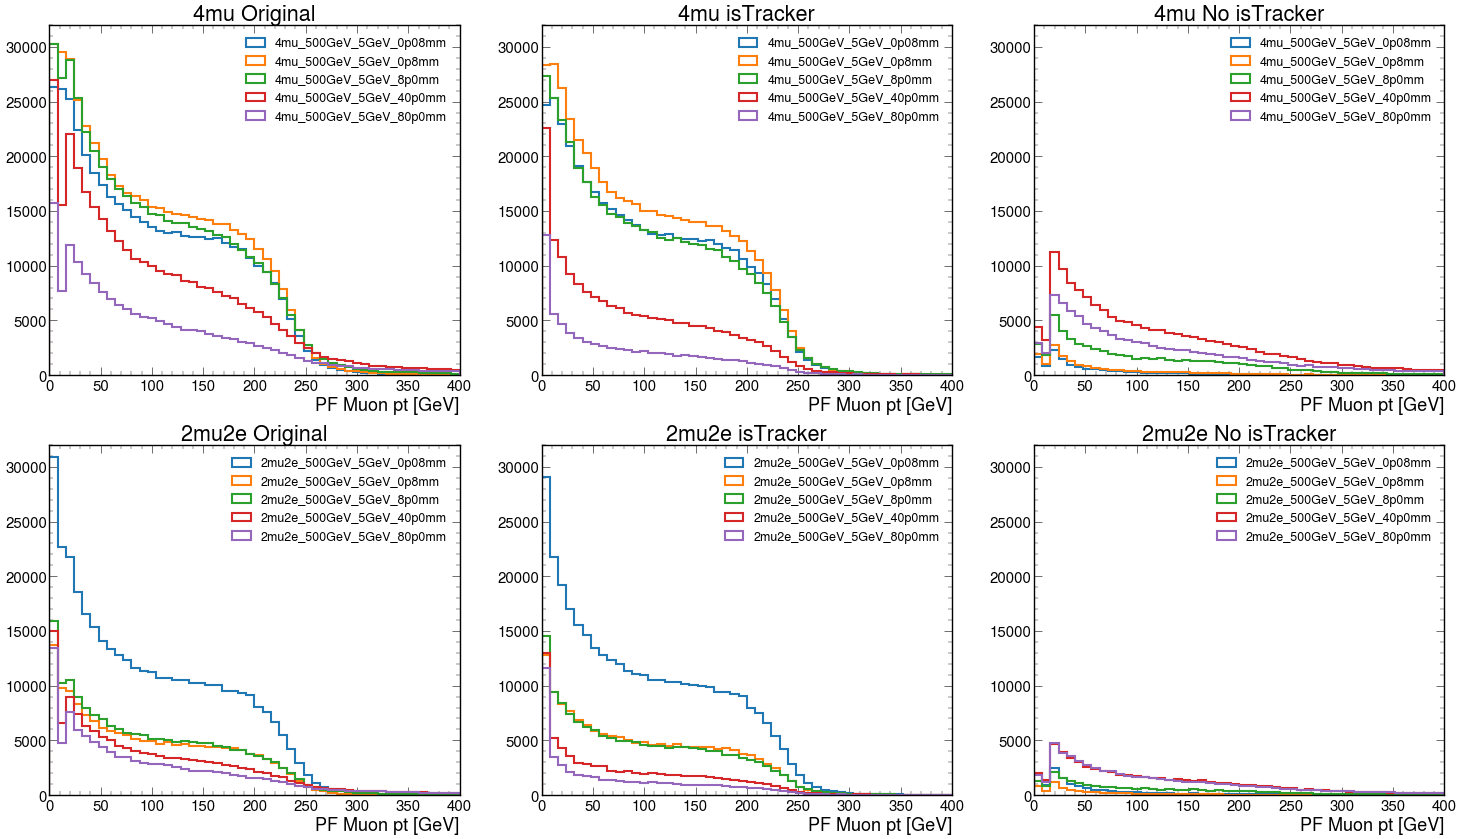

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].isTracker == False)
    mask2 = (events_2mu2e[i_2mu].isTracker == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isTracker]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isTracker]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isTracker')
ax[0][2].set_title('4mu No isTracker')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isTracker')
ax[1][2].set_title('2mu2e No isTracker')

plt.savefig("../Plots/PF_MUON/Boolean/isTracker_pt.png", bbox_inches="tight")

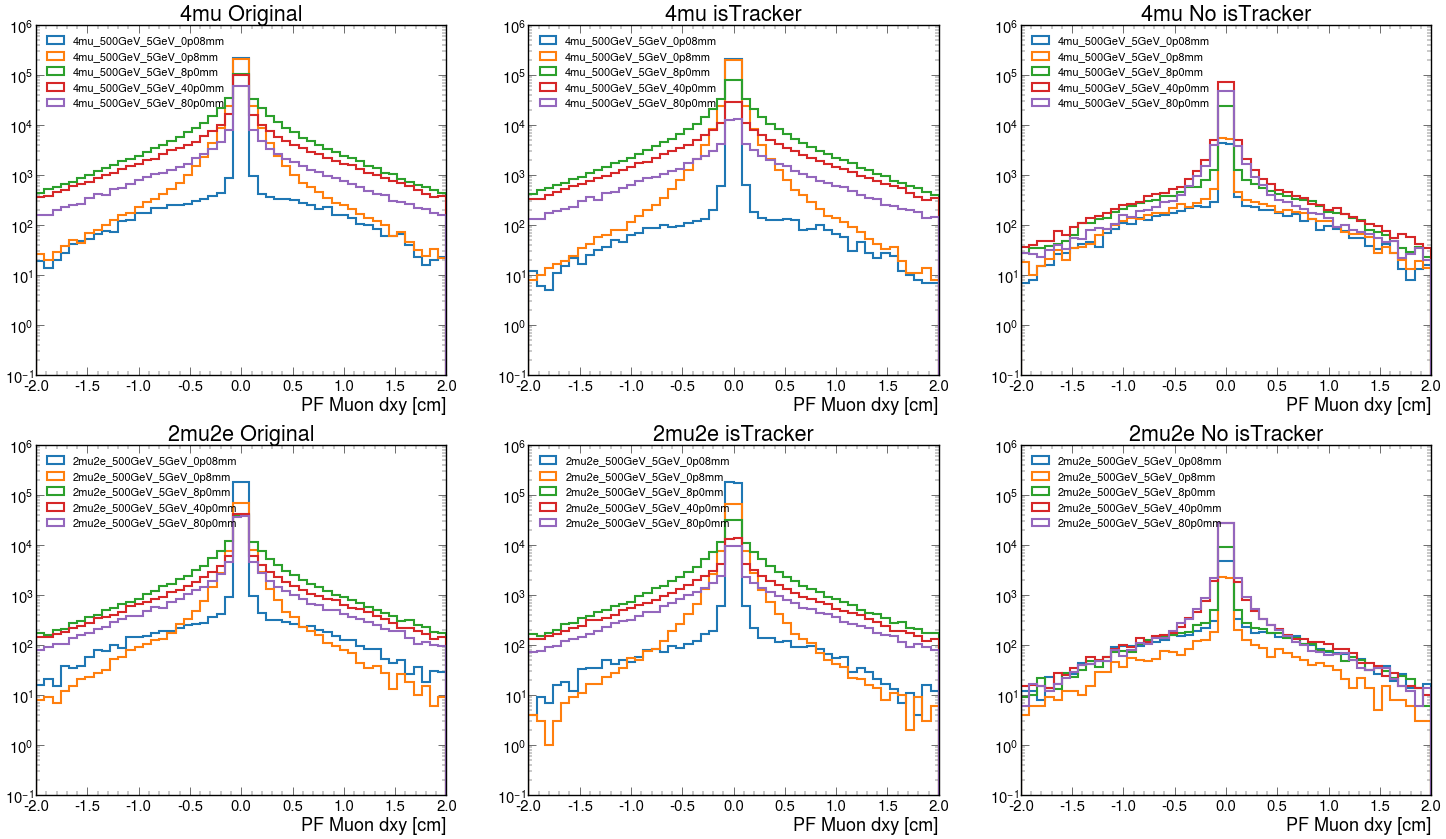

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].isTracker == False)
    mask2 = (events_2mu2e[i_2mu].isTracker == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isTracker]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isTracker]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isTracker')
ax[0][2].set_title('4mu No isTracker')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isTracker')
ax[1][2].set_title('2mu2e No isTracker')

plt.savefig("../Plots/PF_MUON/Boolean/isTracker_dxy.png", bbox_inches="tight")

## looseId

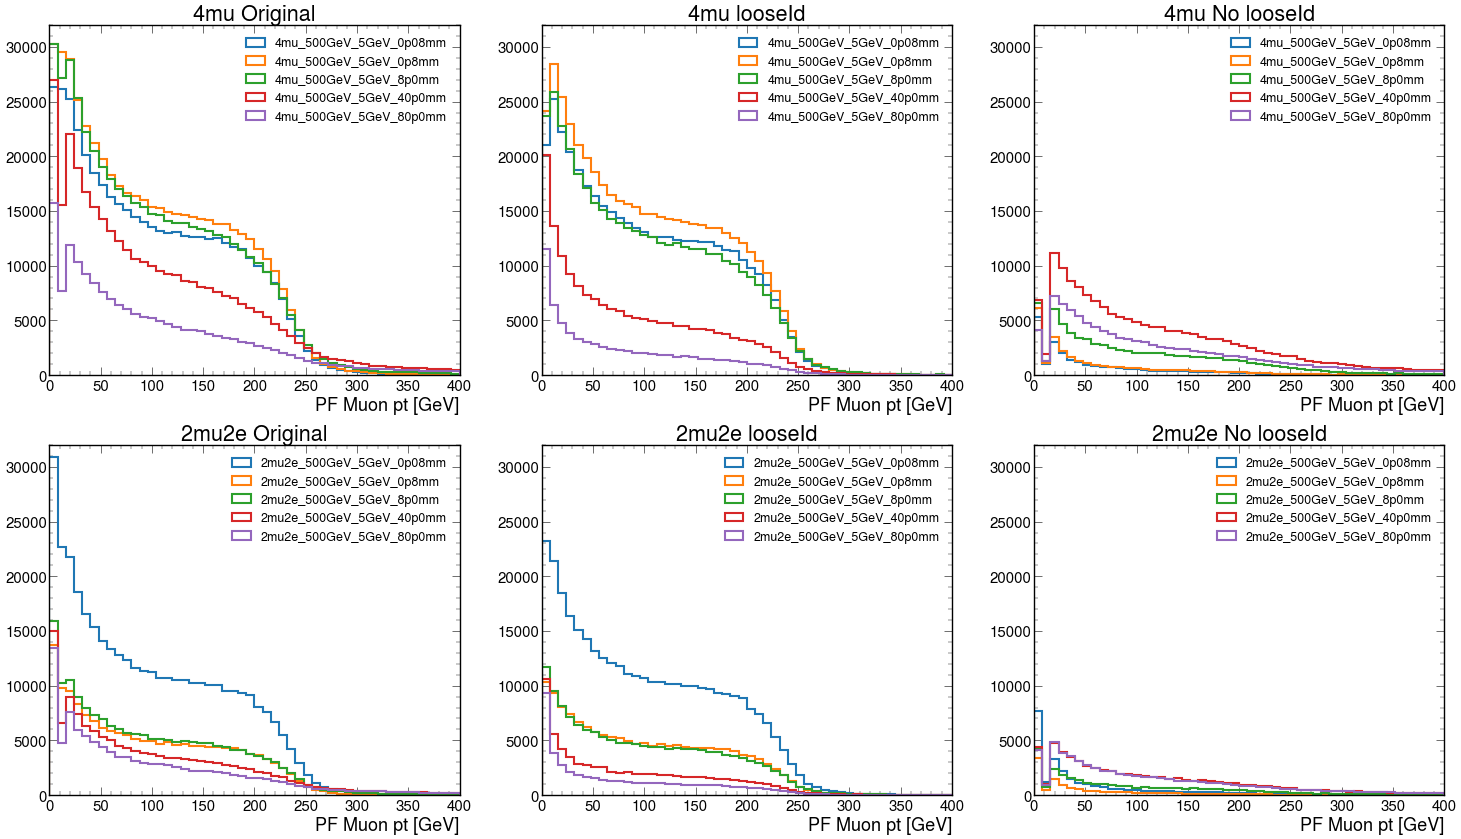

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].looseId == False)
    mask2 = (events_2mu2e[i_2mu].looseId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].looseId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].looseId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu looseId')
ax[0][2].set_title('4mu No looseId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e looseId')
ax[1][2].set_title('2mu2e No looseId')

plt.savefig("../Plots/PF_MUON/Boolean/looseId_pt.png", bbox_inches="tight")

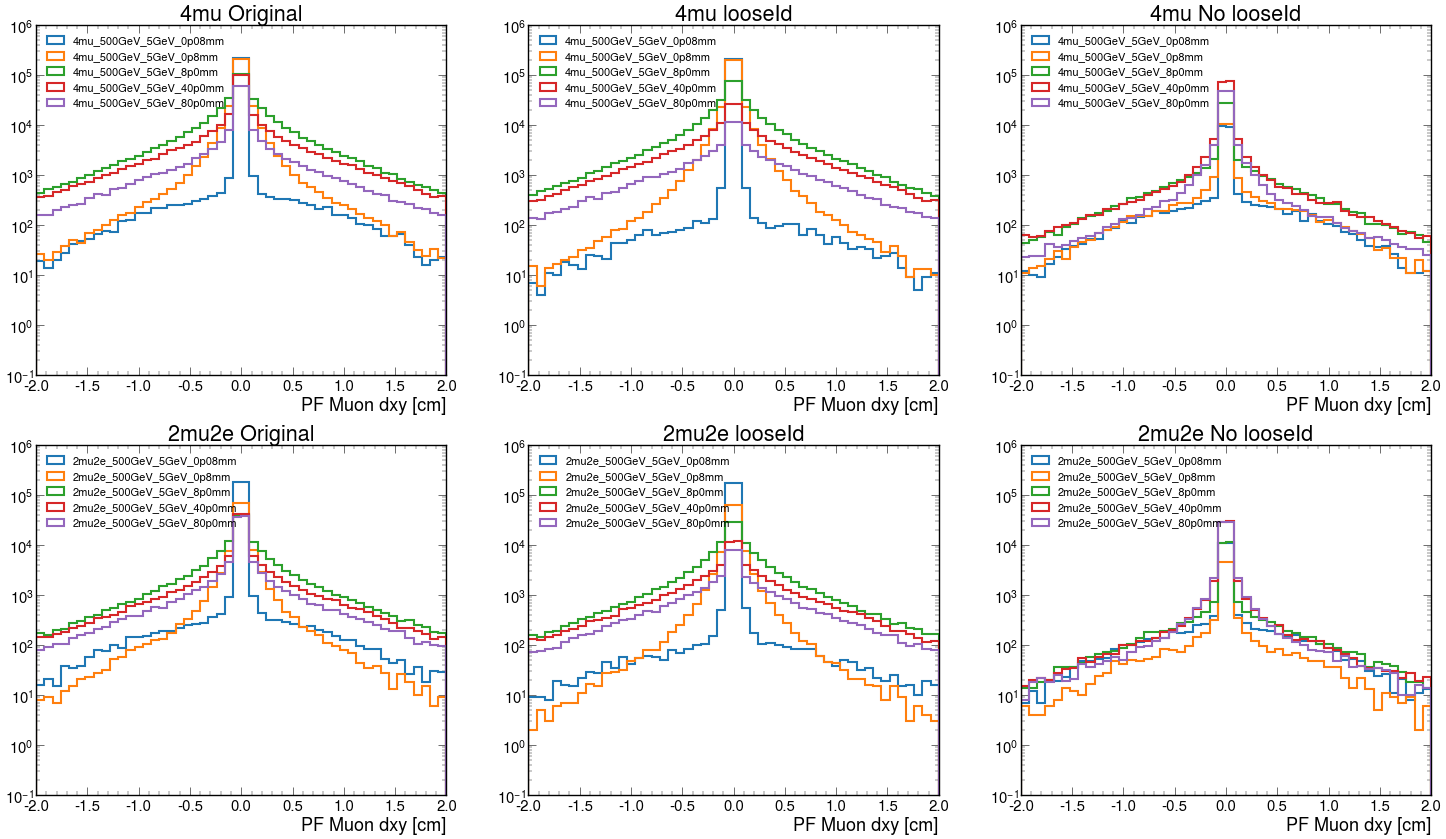

In [24]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].looseId == False)
    mask2 = (events_2mu2e[i_2mu].looseId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].looseId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].looseId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu looseId')
ax[0][2].set_title('4mu No looseId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e looseId')
ax[1][2].set_title('2mu2e No looseId')

plt.savefig("../Plots/PF_MUON/Boolean/looseId_dxy.png", bbox_inches="tight")

## mediumId

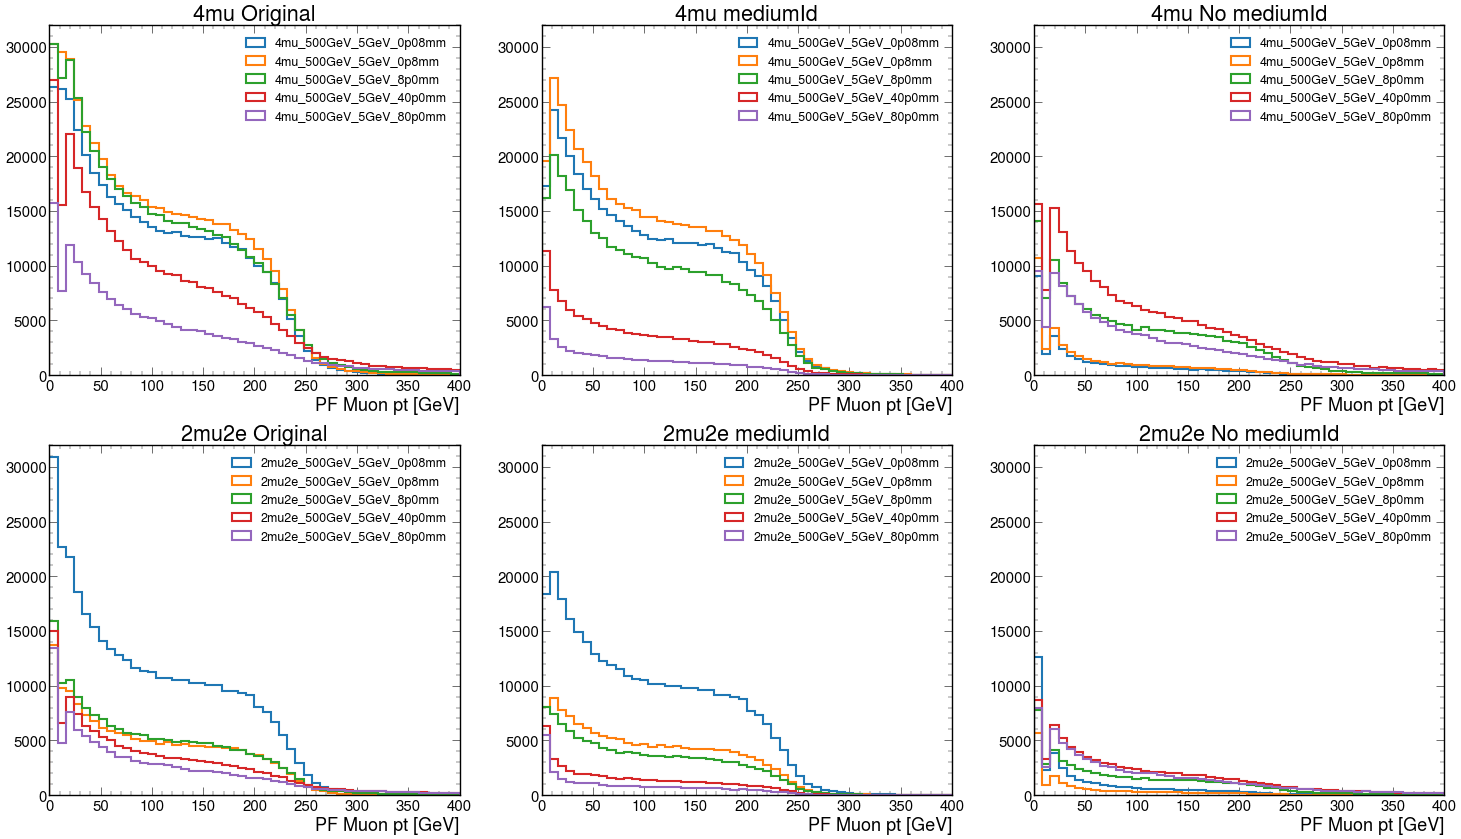

In [25]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].mediumId == False)
    mask2 = (events_2mu2e[i_2mu].mediumId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].mediumId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].mediumId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu mediumId')
ax[0][2].set_title('4mu No mediumId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e mediumId')
ax[1][2].set_title('2mu2e No mediumId')

plt.savefig("../Plots/PF_MUON/Boolean/mediumId_pt.png", bbox_inches="tight")

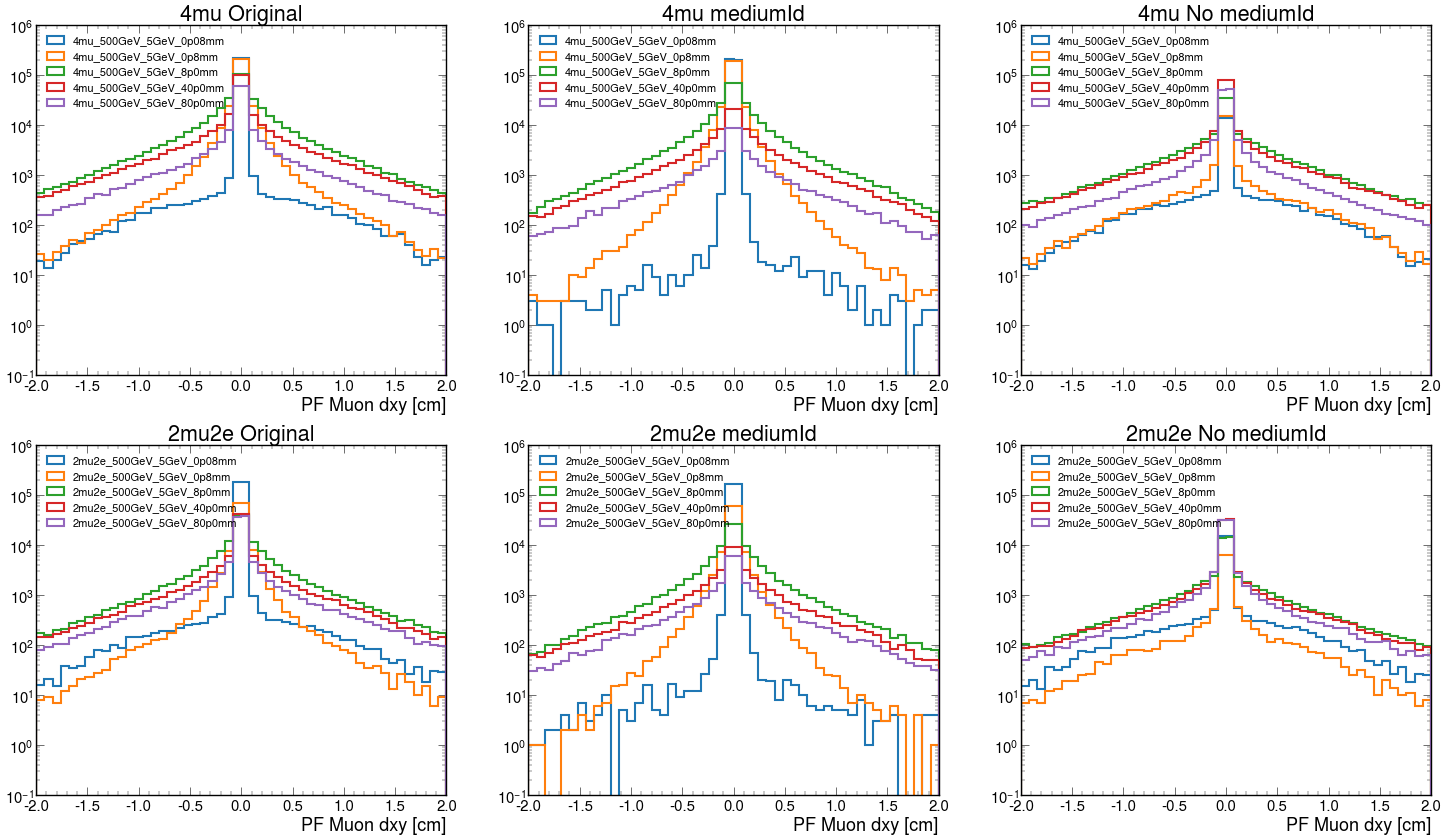

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].mediumId == False)
    mask2 = (events_2mu2e[i_2mu].mediumId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].mediumId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].mediumId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu mediumId')
ax[0][2].set_title('4mu No mediumId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e mediumId')
ax[1][2].set_title('2mu2e No mediumId')

plt.savefig("../Plots/PF_MUON/Boolean/mediumId_dxy.png", bbox_inches="tight")

## mediumPromptId

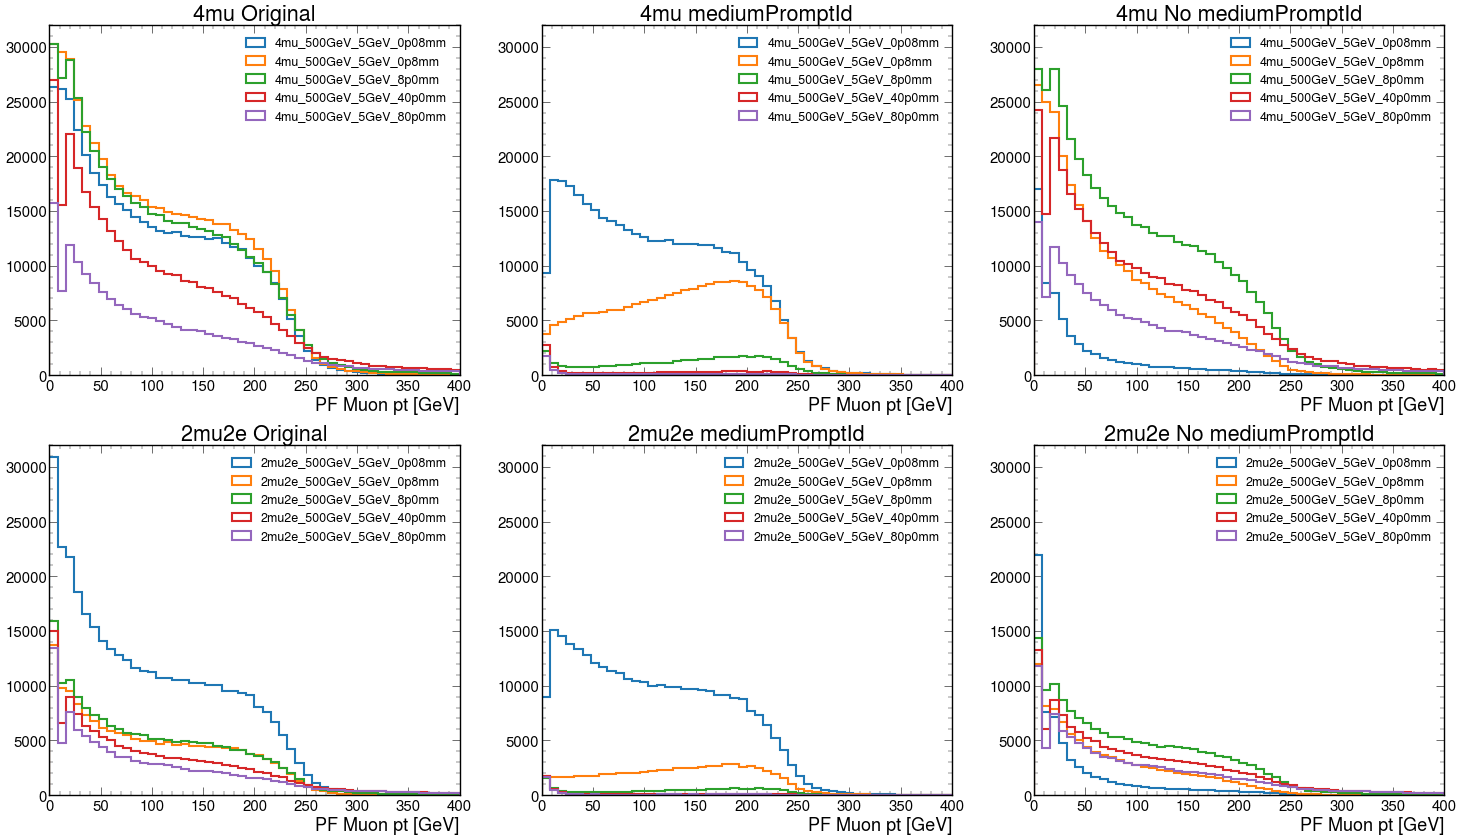

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].mediumPromptId == False)
    mask2 = (events_2mu2e[i_2mu].mediumPromptId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].mediumPromptId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].mediumPromptId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu mediumPromptId')
ax[0][2].set_title('4mu No mediumPromptId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e mediumPromptId')
ax[1][2].set_title('2mu2e No mediumPromptId')

plt.savefig("../Plots/PF_MUON/Boolean/mediumPromptId_pt.png", bbox_inches="tight")

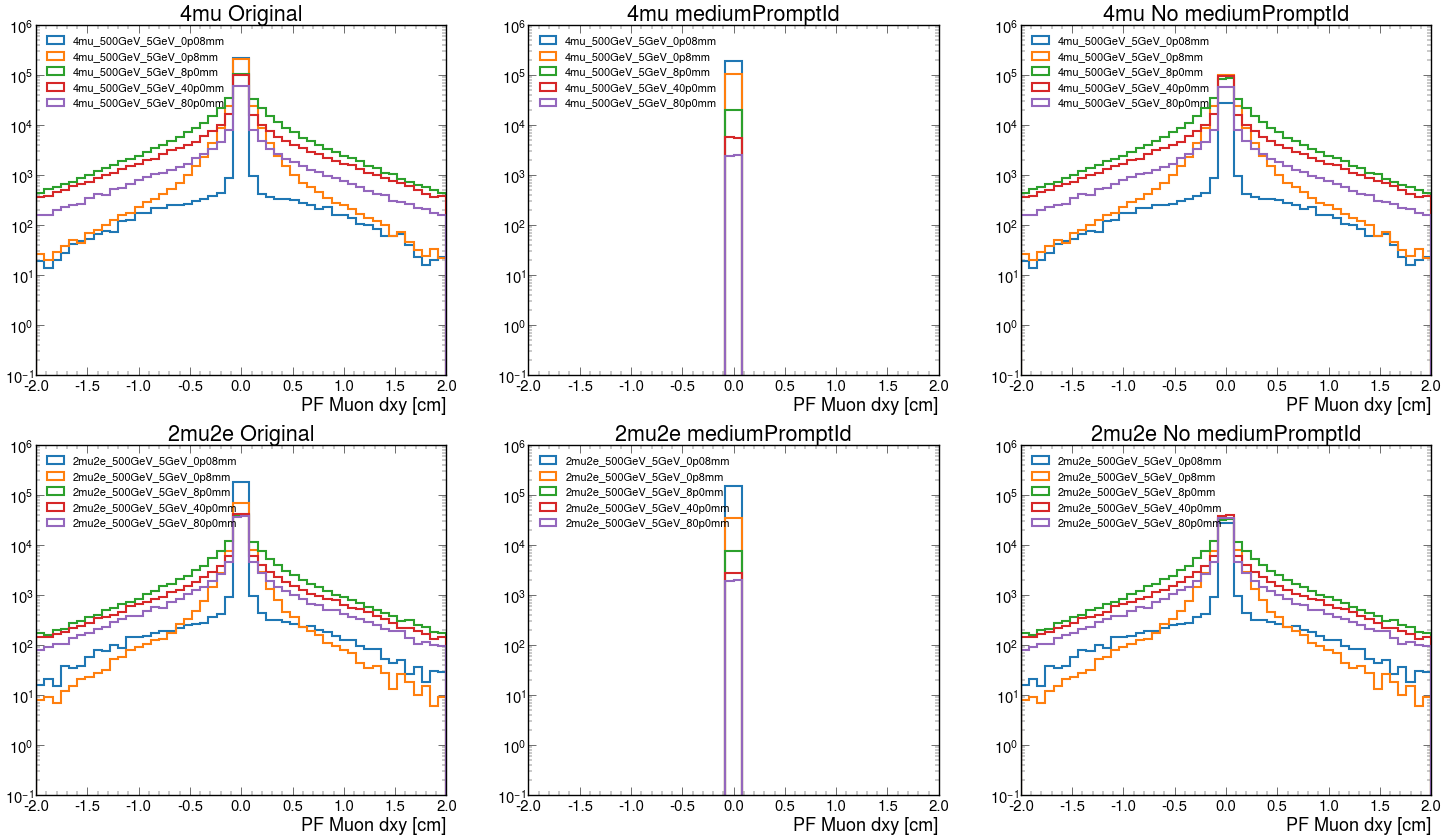

In [28]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].mediumPromptId == False)
    mask2 = (events_2mu2e[i_2mu].mediumPromptId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].mediumPromptId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].mediumPromptId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu mediumPromptId')
ax[0][2].set_title('4mu No mediumPromptId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e mediumPromptId')
ax[1][2].set_title('2mu2e No mediumPromptId')

plt.savefig("../Plots/PF_MUON/Boolean/mediumPromptId_dxy.png", bbox_inches="tight")

## softId

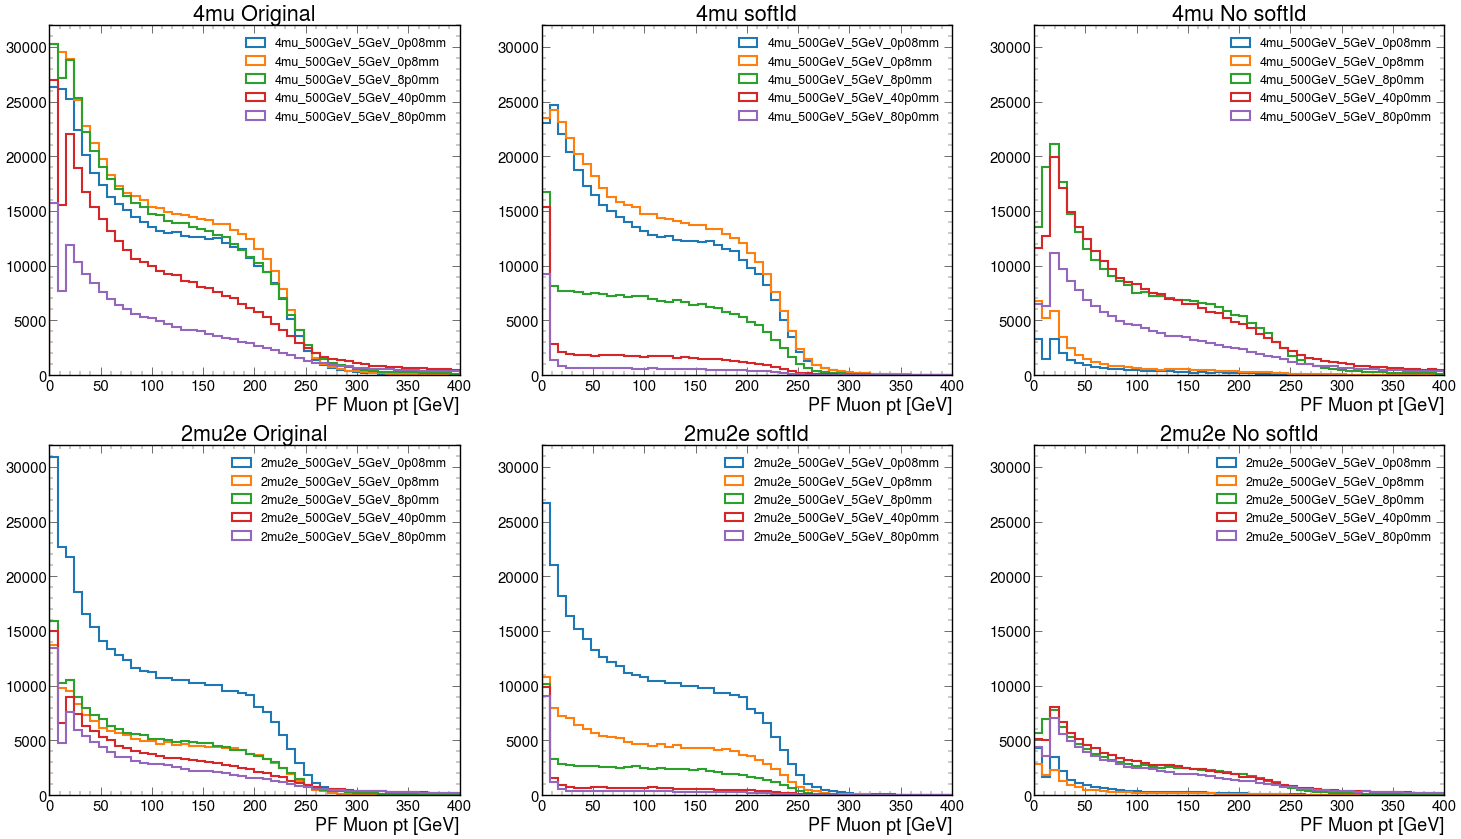

In [29]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].softId == False)
    mask2 = (events_2mu2e[i_2mu].softId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].softId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].softId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu softId')
ax[0][2].set_title('4mu No softId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e softId')
ax[1][2].set_title('2mu2e No softId')

plt.savefig("../Plots/PF_MUON/Boolean/softId_pt.png", bbox_inches="tight")

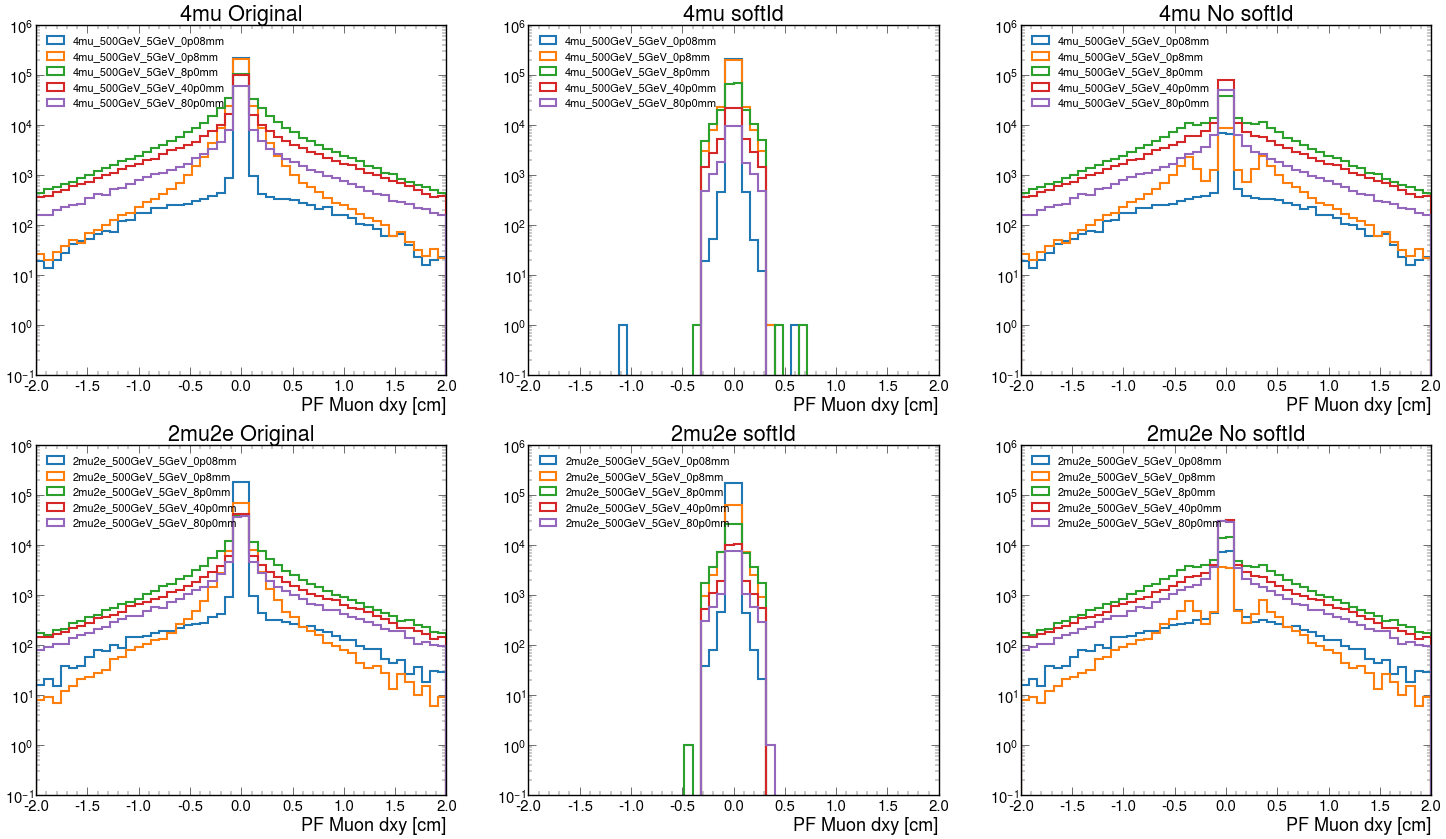

In [30]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].softId == False)
    mask2 = (events_2mu2e[i_2mu].softId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].softId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].softId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu softId')
ax[0][2].set_title('4mu No softId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e softId')
ax[1][2].set_title('2mu2e No softId')

plt.savefig("../Plots/PF_MUON/Boolean/softId_dxy.png", bbox_inches="tight")

## softMvaId

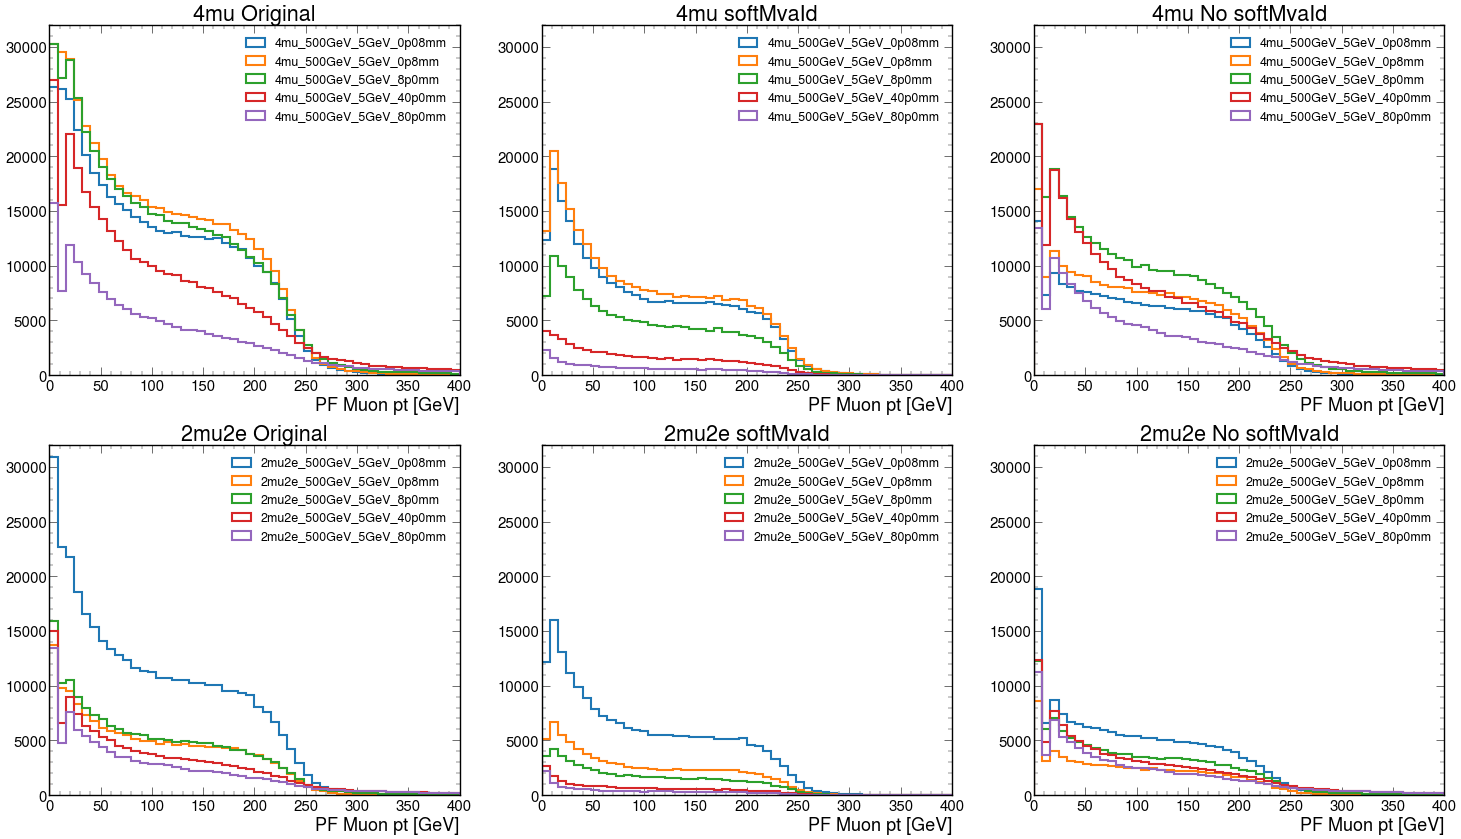

In [31]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].softMvaId == False)
    mask2 = (events_2mu2e[i_2mu].softMvaId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].softMvaId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].softMvaId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu softMvaId')
ax[0][2].set_title('4mu No softMvaId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e softMvaId')
ax[1][2].set_title('2mu2e No softMvaId')

plt.savefig("../Plots/PF_MUON/Boolean/softMvaId_pt.png", bbox_inches="tight")

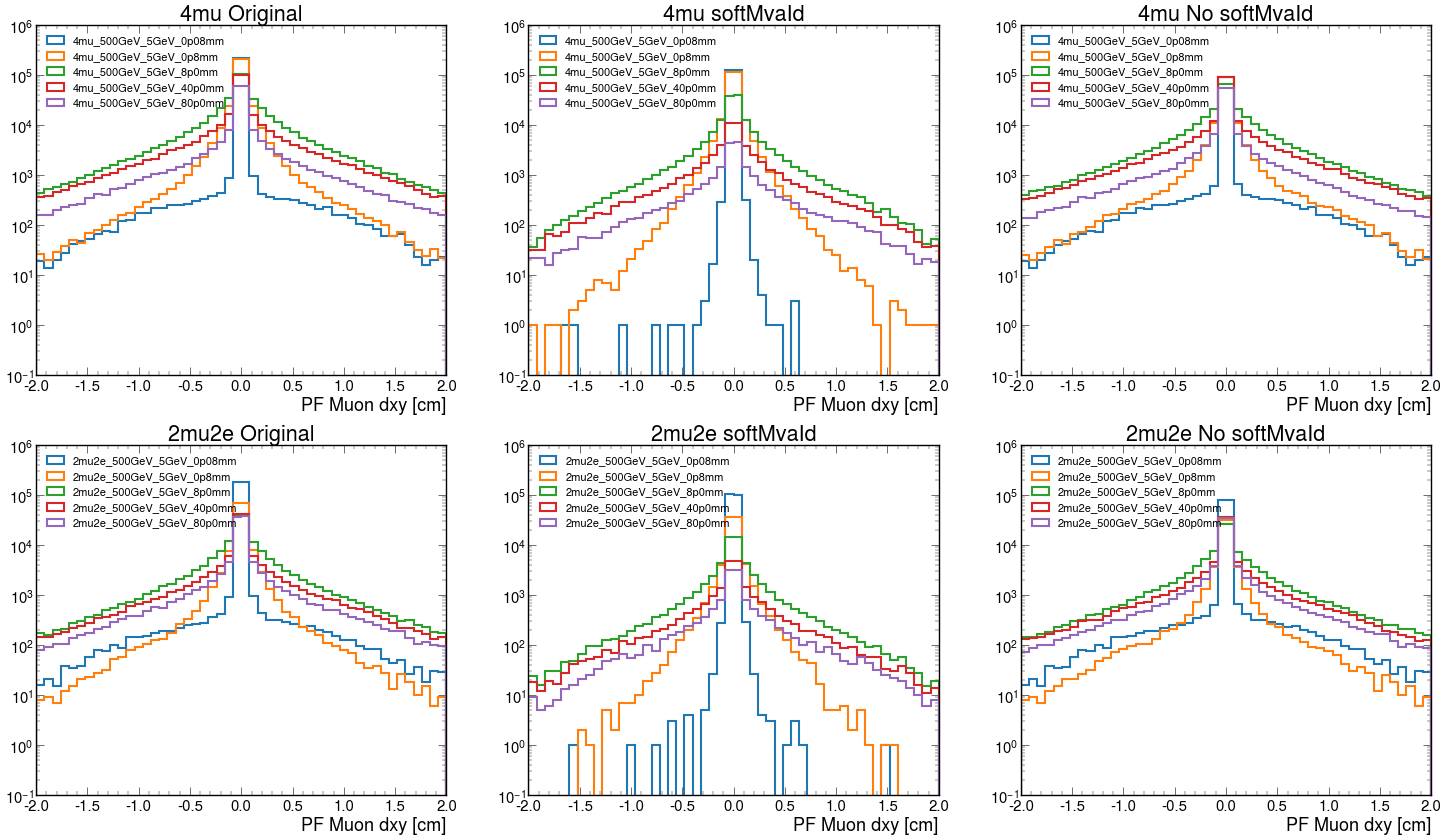

In [32]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].softMvaId == False)
    mask2 = (events_2mu2e[i_2mu].softMvaId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].softMvaId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].softMvaId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu softMvaId')
ax[0][2].set_title('4mu No softMvaId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e softMvaId')
ax[1][2].set_title('2mu2e No softMvaId')

plt.savefig("../Plots/PF_MUON/Boolean/softMvaId_dxy.png", bbox_inches="tight")

## tightId 

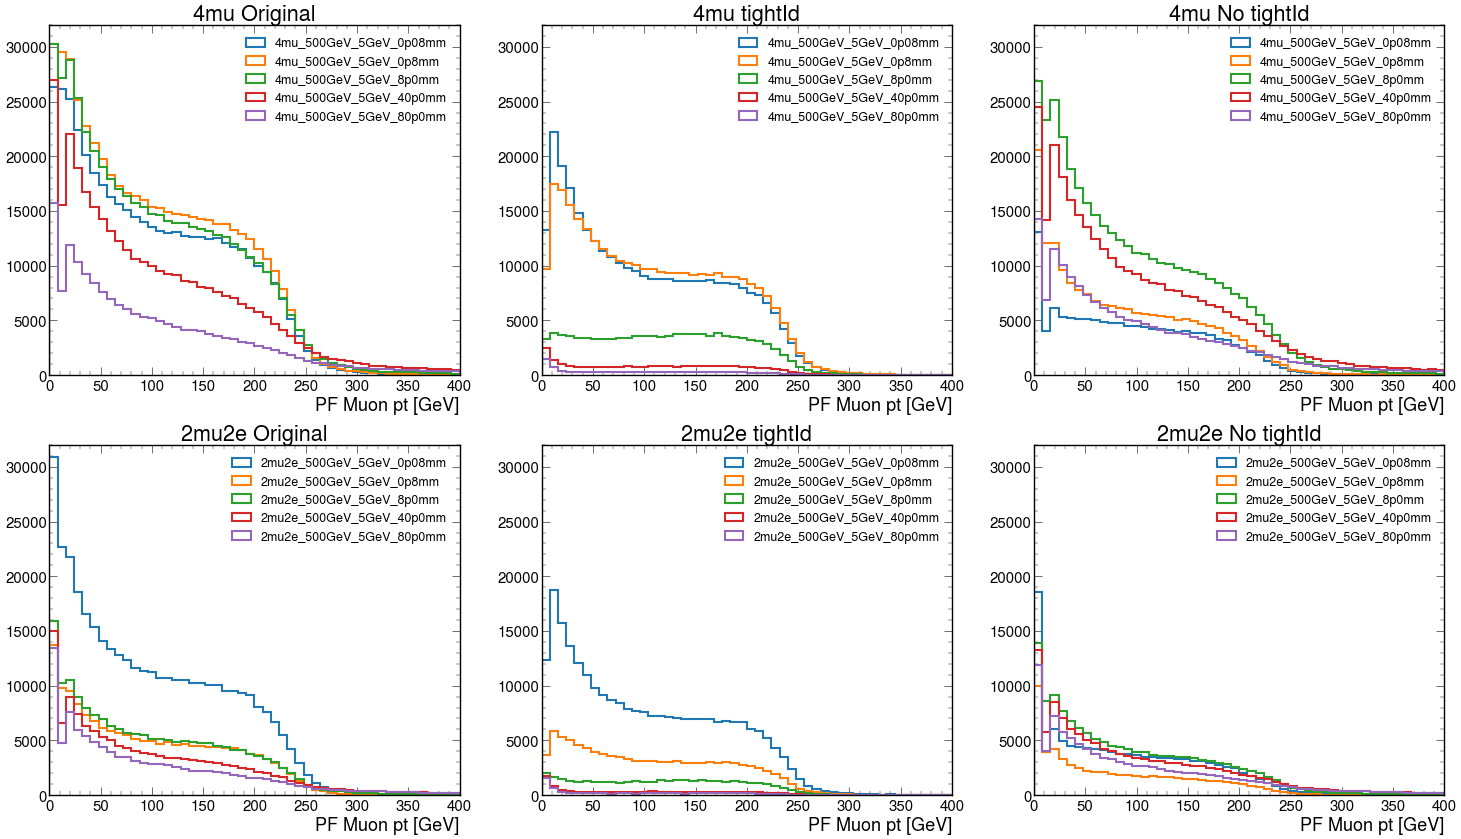

In [33]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].tightId == False)
    mask2 = (events_2mu2e[i_2mu].tightId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].tightId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].tightId]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu tightId')
ax[0][2].set_title('4mu No tightId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e tightId')
ax[1][2].set_title('2mu2e No tightId')

plt.savefig("../Plots/PF_MUON/Boolean/tightId_pt.png", bbox_inches="tight")

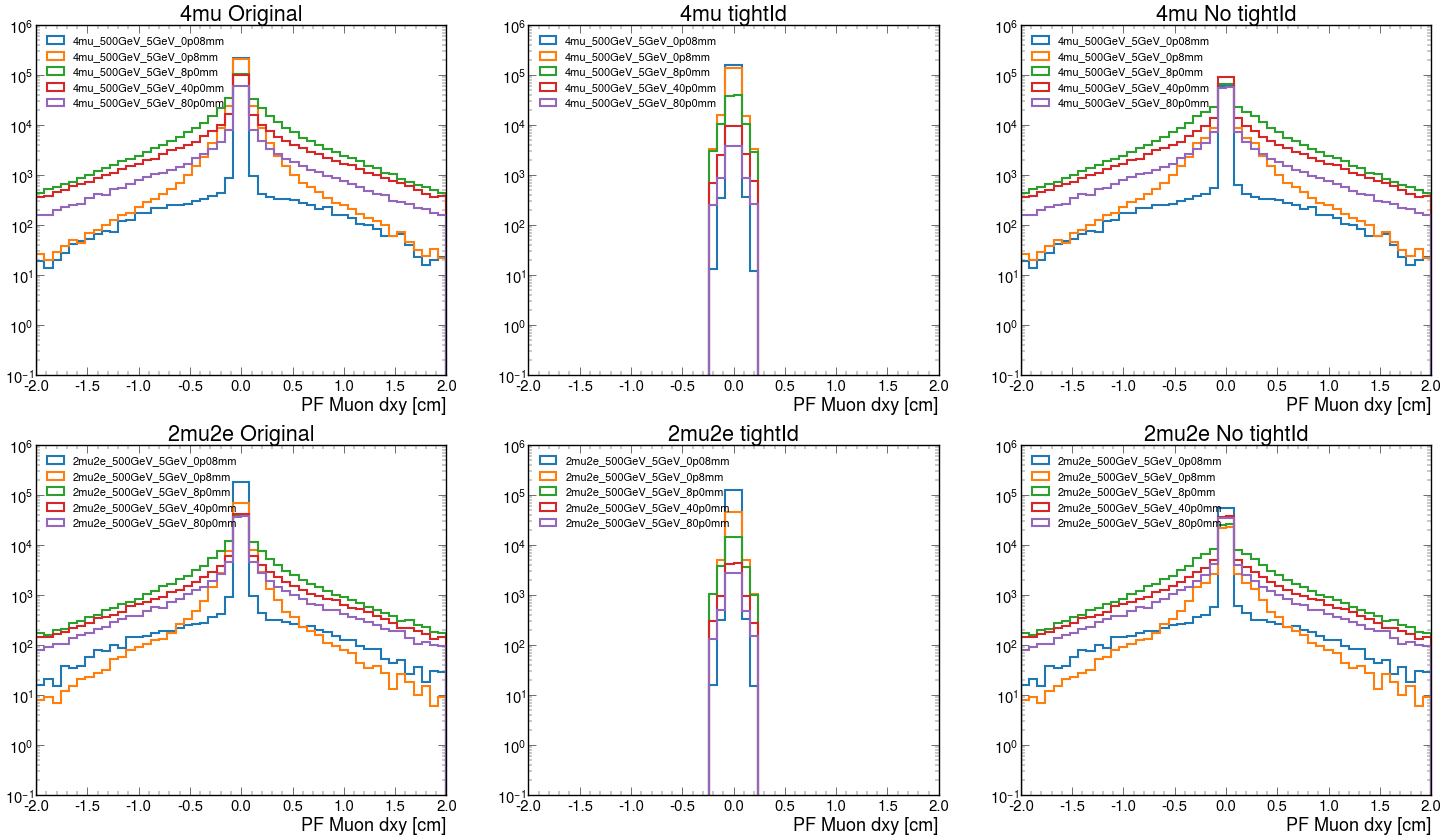

In [35]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].tightId == False)
    mask2 = (events_2mu2e[i_2mu].tightId == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].tightId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].tightId]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu tightId')
ax[0][2].set_title('4mu No tightId')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e tightId')
ax[1][2].set_title('2mu2e No tightId')

plt.savefig("../Plots/PF_MUON/Boolean/tightId_dxy.png", bbox_inches="tight")

## triggerIdLoose

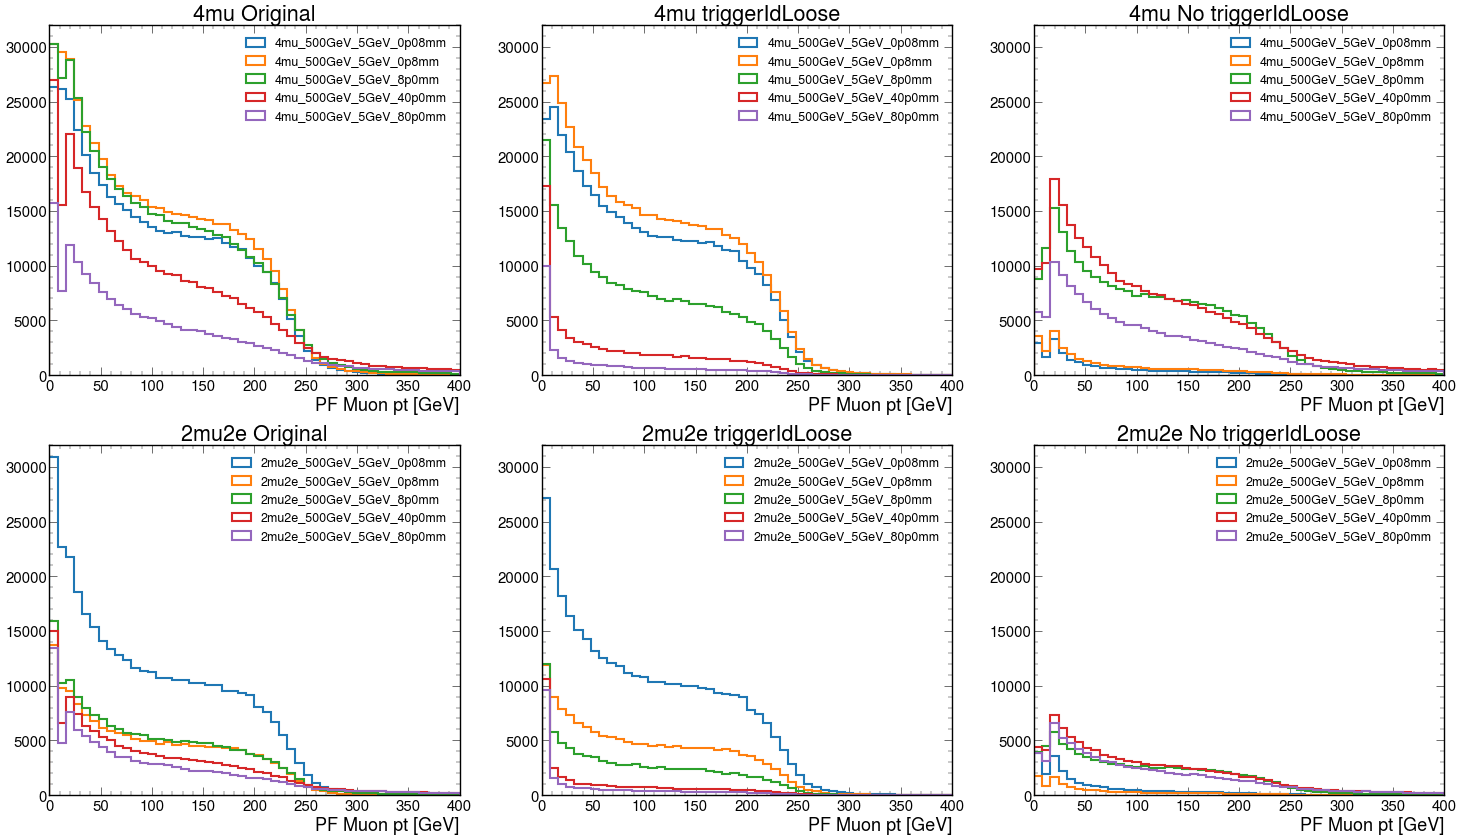

In [36]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].triggerIdLoose == False)
    mask2 = (events_2mu2e[i_2mu].triggerIdLoose == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].triggerIdLoose]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].triggerIdLoose]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[0][2].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,32000)
ax[0][1].set_ylim(0,32000)
ax[0][2].set_ylim(0,32000)
ax[1][0].set_ylim(0,32000)
ax[1][1].set_ylim(0,32000)
ax[1][2].set_ylim(0,32000)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[0][2].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')
ax[1][2].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu triggerIdLoose')
ax[0][2].set_title('4mu No triggerIdLoose')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e triggerIdLoose')
ax[1][2].set_title('2mu2e No triggerIdLoose')

plt.savefig("../Plots/PF_MUON/Boolean/triggerIdLoose_pt.png", bbox_inches="tight")

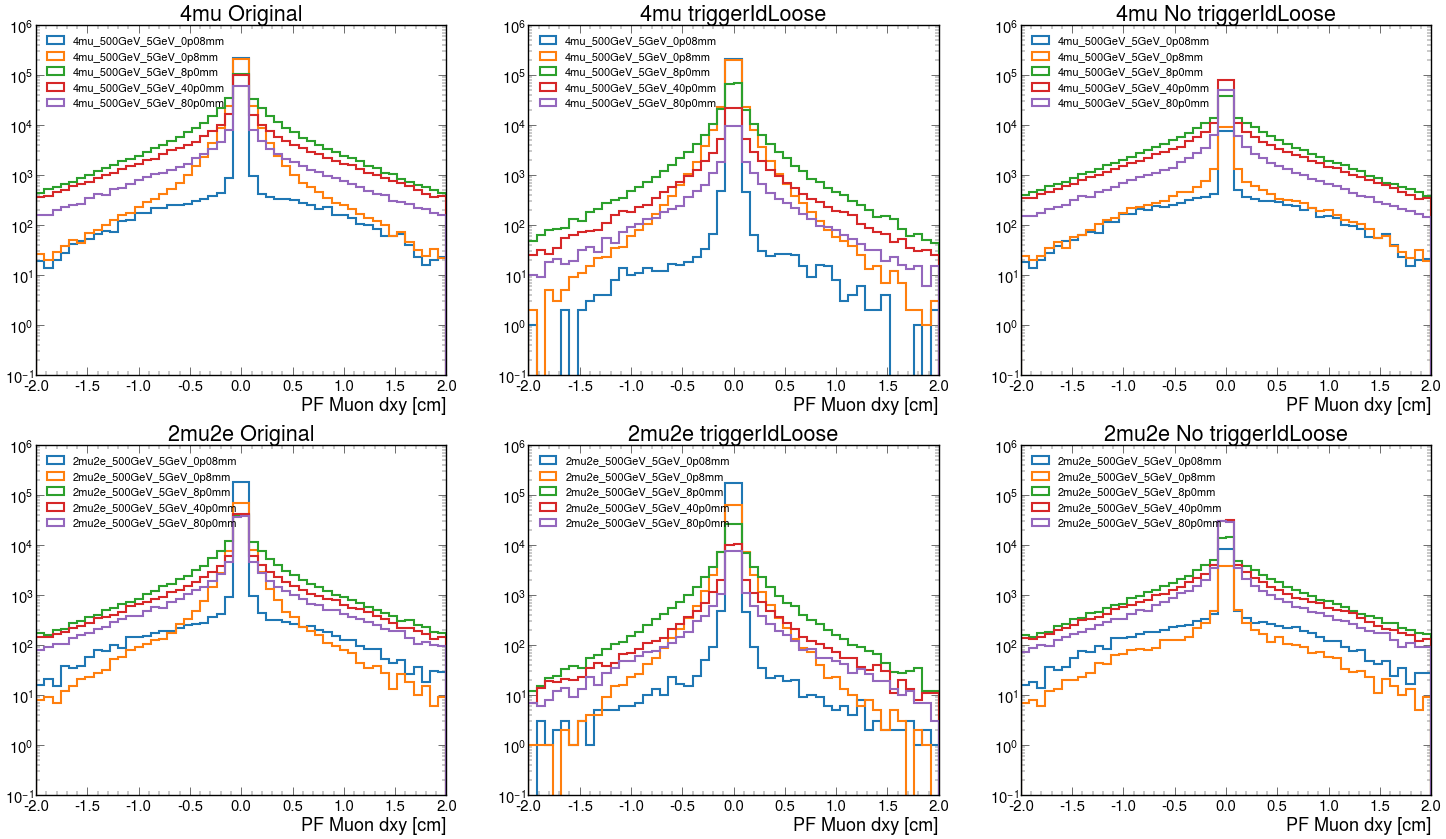

In [37]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].triggerIdLoose == False)
    mask2 = (events_2mu2e[i_2mu].triggerIdLoose == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].triggerIdLoose]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].triggerIdLoose]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Muon dxy [cm]')
ax[0][1].set_xlabel('PF Muon dxy [cm]')
ax[0][2].set_xlabel('PF Muon dxy [cm]')
ax[1][0].set_xlabel('PF Muon dxy [cm]')
ax[1][1].set_xlabel('PF Muon dxy [cm]')
ax[1][2].set_xlabel('PF Muon dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu triggerIdLoose')
ax[0][2].set_title('4mu No triggerIdLoose')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e triggerIdLoose')
ax[1][2].set_title('2mu2e No triggerIdLoose')

plt.savefig("../Plots/PF_MUON/Boolean/triggerIdLoose_dxy.png", bbox_inches="tight")